In [1]:
import pandas as pd
import numpy as np
import torch.nn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv(r'Salary_dataset.csv')

In [5]:
df.shape

(30, 3)

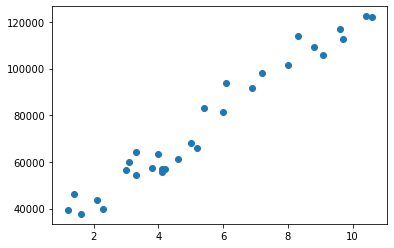

In [6]:
plt.scatter(df['YearsExperience'].values, df['Salary'].values)

In [7]:
data = df.iloc[:, -2:]
data = StandardScaler().fit_transform(data)

In [8]:
x = data[:, 0]
y = data[:, 1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1, train_size=0.9)

In [10]:
lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [11]:
predictions = lr.predict(x_test.reshape(-1, 1))
mae = mean_absolute_error(predictions, y_test.reshape(-1, 1))
mse = mean_squared_error(predictions, y_test.reshape(-1, 1))

In [12]:
predictions

array([[ 1.48624116],
       [-0.1478667 ],
       [ 0.99948562]])

In [13]:
mae

0.22725791462680558

In [14]:
mse

0.06723124814976794

In [15]:
class NNLinearRegression(torch.nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 720)
        self.linear1 = torch.nn.Linear(720, 1)
        
    def forward(self, x):
        x = x.reshape(-1, 1)
        x = self.linear(x)
        x = self.linear1(x)
        
        return torch.nn.functional.relu(x)

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
nn_lr = NNLinearRegression()
nn_lr.to(device)
optim = torch.optim.SGD(nn_lr.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [18]:
nn_lr.train()
x1_train = torch.Tensor(x_train.T)
y1_train = torch.Tensor(y_train.T)

In [19]:
epochs = 20
for i in range(epochs):
    pred = nn_lr(x1_train)
    loss = criterion(pred, y1_train)
    loss.backward()
    optim.step()
    optim.zero_grad()
    if i%5 == 0:
        print("Epoch {}, loss: {}".format(str(i), loss.item()))

Epoch 0, loss: 1.1565173864364624
Epoch 5, loss: 0.9665074944496155
Epoch 10, loss: 0.9665074944496155
Epoch 15, loss: 0.9665074944496155


C:\Users\Azamat.Ilyasov\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([27])) that is different to the input size (torch.Size([27, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [20]:
nn_lr.eval()
predictions = nn_lr(torch.Tensor(x_test))

In [21]:
predictions

tensor([[0.],
        [0.],
        [0.]], grad_fn=<ReluBackward0>)